# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Kangho Ji
- Pranav Guntupalli
- Victoria Charry
- Shiv Patel


## Part 1: 
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

## Problem Motivation 

Prescription drug misuse and adverse side effects pose a major and growing challenge in the United States, contributing to addiction, hospitalization, and overdose-related deaths. Understanding patterns in prescription drug events can provide valuable insight into which medications are most commonly associated with serious outcomes and how different demographic factors relate to these risks. This analysis will use data from the U.S. Food and Drug Administration’s OpenFDA Drug Event API to explore trends in adverse drug reactions and their relationship to patient characteristics such as age and gender.
By analyzing these patterns, we aim to identify high-risk medications, uncover demographic trends in drug safety, and visualize how adverse events change over time. These findings can help inform safer prescribing practices, guide public health interventions, and support efforts to raise awareness about responsible medication use. Additionally, the cleaned dataset from this phase will serve as the foundation for predictive modeling in later stages, where we will explore how machine learning can estimate the likelihood of serious drug-related outcomes based on patient and drug features.
The key questions are as follows:
1. Are there demographic trends (age and gender) linked to higher risk of adverse drug events?
2. What are the most common adverse reactions reported for prescription opioids and controlled substances?
3. an we predict the seriousness of a reported adverse event using features such as age, gender, and drug type?


Motivating sources:
- U.S. Food and Drug Administration. OpenFDA Drug Event API Documentation. https://open.fda.gov/apis/drug/event/. Accessed 25 Oct. 2025.
- Centers for Disease Control and Prevention (CDC). Understanding the Epidemic of Prescription Drug Misuse. https://www.cdc.gov/opioids/basics/epidemic.html. Accessed 25 Oct. 2025.
- National Institute on Drug Abuse (NIDA). Prescription Opioids and Addiction. https://nida.nih.gov/publications/drugfacts/prescription-opioids. Accessed 25 Oct. 2025.

## Summary of the Data Processing Pipeline

1. Fetch data from the OpenFDA Drug Event API using targeted queries by drug name and date range.
2. Clean the data to prepare the DataFrame for visualization and analysis.
3. Visualize using plotting libraries such as Seaborn, Plotly, and Matplotlib.
   
To process the data, we will first acquire adverse-event datasets from the OpenFDA API. This involves using API calls to collect data related to various medications, patient demographics, and reaction types. Once the data is retrieved, we will normalize the JSON structure into a Pandas DataFrame, remove invalid or missing values, and standardize data types across all columns. This cleaning process includes handling missing or inconsistent entries such as unknown gender codes or missing age fields, converting date values to datetime format, and renaming columns for clarity.
Next, we will merge multiple datasets representing different drug names or time periods to create one unified DataFrame. This will allow us to analyze broader trends in drug safety and patient outcomes. After cleaning and merging, we will begin exploratory data analysis by generating descriptive statistics and creating visualizations. These will include a histogram displaying the top ten drugs with the highest number of reported adverse events, and a scatterplot showing demographic distributions (age and gender) among patients for various medications.
Finally, the cleaned dataset will be prepared for use in future modeling phases, where relevant features such as drug name, age, gender, and reaction type will be selected for predicting the seriousness of adverse drug events. These steps will ensure a reproducible workflow from raw API data collection to visualization and machine learning.


## Part 2: 
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [2]:
import requests
import pandas as pd

In [4]:
url = "https://api.fda.gov/drug/event.json"
drugs = ["OXYCODONE", "HYDROCODONE", "FENTANYL", "ALPRAZOLAM", "AMPHETAMINE"]

all_data = []

for drug in drugs:
    params = {"search": f"patient.drug.medicinalproduct:{drug}", "limit": 1000}
    response = requests.get(url, params=params)
    
    results = response.json().get("results", [])
    
    for record in results:
        patient = record.get("patient", {})
        reactions = patient.get("reaction", [])
        reaction_text = ", ".join([r.get("reactionmeddrapt", "") for r in reactions])
        
        all_data.append({
            "drug": drug,
            "age": patient.get("patientonsetage"),
            "sex": patient.get("patientsex"),
            "reaction": reaction_text,
            "serious": record.get("serious"),
            "date": record.get("receivedate")
        })

# Create DataFrame
df = pd.DataFrame(all_data)

# Clean data
df.dropna(subset=["age", "sex", "reaction", "date"], inplace=True)
df["sex"] = df["sex"].replace({1: "Male", 2: "Female", 0: "Unknown"})
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.drop_duplicates(inplace=True)

print(f"Total records: {len(df)}")
print(df.head())

Total records: 3913
        drug age sex                                           reaction  \
0  OXYCODONE  63   2  Loss of consciousness, Fall, Gait disturbance,...   
1  OXYCODONE  70   1                      Nephrogenic systemic fibrosis   
2  OXYCODONE  53   2  Hyponatraemia, Dyspnoea, Pyrexia, Pancreatitis...   
4  OXYCODONE  68   2                  Nausea, Drug administration error   
5  OXYCODONE  71   1                                              Death   

  serious       date  
0       1 2014-03-12  
1       1 2014-03-12  
2       1 2014-03-12  
4       2 2014-03-12  
5       1 2014-03-12  


## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

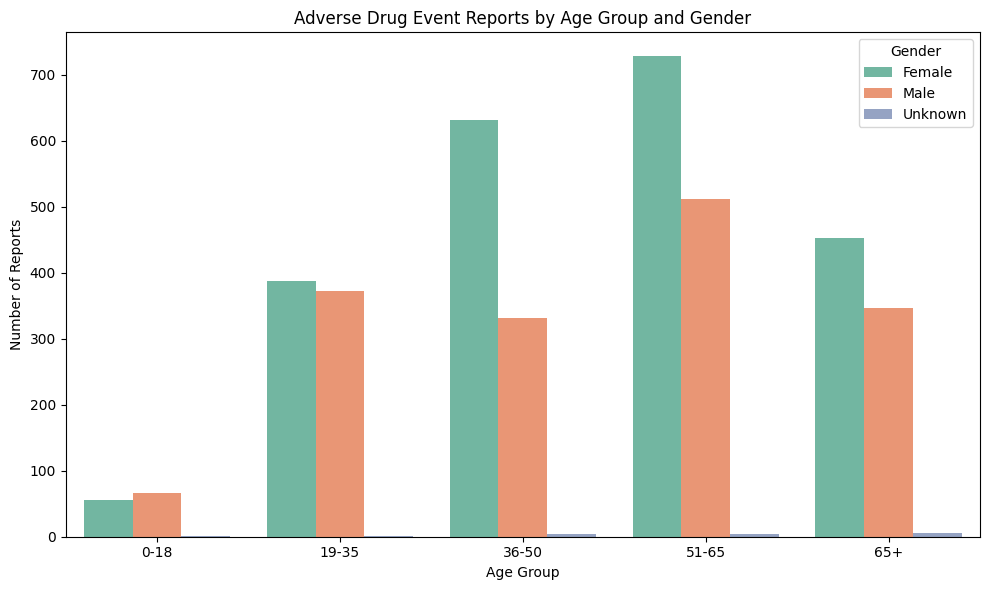

In [23]:
# Convert age to numeric and clean
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

# Convert sex to numeric FIRST, then replace
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')
df['sex'] = df['sex'].replace({0: 'Unknown', 1: 'Male', 2: 'Female'})

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], 
                          labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Count adverse events by age group and sex
demographic_counts = df.groupby(['age_group', 'sex'], observed=True).size().reset_index(name='count')

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_counts, x='age_group', y='count', hue='sex', palette='Set2')
plt.title("Adverse Drug Event Reports by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Reports")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

This grouped bar chart answers the question "Are there demographic trends (age and gender) linked to higher risk of adverse drug events?" We can clearly observe that the 51-65 age group experiences the highest number of adverse event reports, with approximately 730 reports for females and 510 for males, indicating this demographic faces the greatest risk. Additionally, females consistently report more adverse events than males across nearly all age groups, particularly in the middle-age and senior categories (36-65). The 0-18 age group shows significantly fewer reports, suggesting these drugs are either less prescribed to minors or adverse events are less common in younger populations. Overall, this chart reveals that middle-aged and senior adults, especially females aged 36-65, are the highest-risk demographics for adverse drug events, which could inform targeted safety monitoring programs and patient education initiatives for these vulnerable populations.

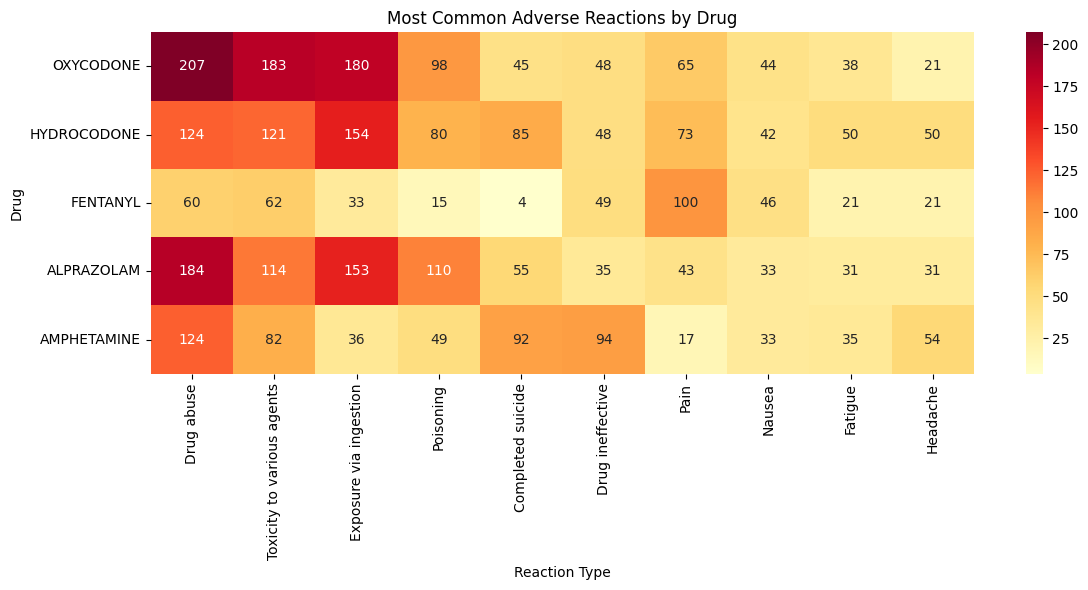

In [24]:
# Get top 10 most common reactions
top_reactions = df['reaction'].str.split(', ', expand=True).stack().value_counts().head(10).index

# Create presence matrix
reaction_counts = []
for drug in drugs:
    drug_df = df[df['drug'] == drug]
    counts = []
    for reaction in top_reactions:
        count = drug_df['reaction'].str.contains(reaction, na=False).sum()
        counts.append(count)
    reaction_counts.append(counts)

plt.figure(figsize=(12,6))
sns.heatmap(reaction_counts, annot=True, fmt='d', 
            xticklabels=top_reactions, yticklabels=drugs, cmap='YlOrRd')
plt.title("Most Common Adverse Reactions by Drug")
plt.xlabel("Reaction Type")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()

This heatmap answers the question "What are the most common adverse reactions reported for prescription opioids and controlled substances?" We can clearly observe the dark red/maroon colors indicating the highest frequencies of specific drug-reaction pairs, particularly Oxycodone with drug abuse (207 reports), toxicity to various agents (183 reports), and exposure via ingestion (180 reports). Similarly, Alprazolam shows high rates of drug abuse (184 reports) and exposure via ingestion (153 reports), revealing a pattern of misuse across these controlled substances. Notably, opioids share similar adverse reaction profiles dominated by drug abuse, toxicity, and ingestion-related issues, while Fentanyl uniquely shows elevated reports of drug ineffective (100 reports) and pain (100 reports), suggesting tolerance or inadequate pain management. Amphetamine exhibits a distinct pattern with higher rates of completed suicide (92 reports) and drug ineffective (94 reports), differentiating it from the opioid class. Overall, this heatmap reveals that drug abuse, toxicity, and improper ingestion are the predominant safety concerns across these controlled substances, which could inform enhanced prescription monitoring programs, patient education about proper usage, and targeted interventions to prevent misuse and accidental overdoses.